# Transformers y NLP Moderno

Este notebook cubre los conceptos de Transformers y su aplicación en Procesamiento de Lenguaje Natural (NLP).

## Introducción

Los Transformers son arquitecturas de redes neuronales que han revolucionado el NLP. Introducidos en 2017 con "Attention Is All You Need", son la base de modelos como BERT, GPT, T5, etc.

### Conceptos Clave

- **Attention Mechanism**: Permite al modelo enfocarse en partes relevantes de la entrada
- **Self-Attention**: El modelo atiende a diferentes posiciones de su propia secuencia
- **Encoder-Decoder**: Arquitectura para tareas de secuencia a secuencia
- **Pre-training y Fine-tuning**: Entrenar en grandes corpus y luego adaptar a tareas específicas


## Importar Librerías


In [1]:
# Suprimir mensajes informativos de TensorFlow (usado por transformers)
# IMPORTANTE: Estas variables deben establecerse ANTES de importar transformers
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suprime INFO y WARNING

try:
    import tensorflow as tf
    tf.get_logger().setLevel('ERROR')
except:
    pass  # TensorFlow puede no estar instalado, pero transformers puede usar PyTorch

try:
    from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
    from transformers import GPT2LMHeadModel, GPT2Tokenizer
    TRANSFORMERS_AVAILABLE = True
    print("✓ Transformers disponible")
except ImportError:
    TRANSFORMERS_AVAILABLE = False
    print("⚠ Transformers no está instalado. Instala con: pip install transformers torch")

import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)


✓ Transformers disponible


## 1. Uso de Modelos Pre-entrenados

Hugging Face Transformers proporciona acceso fácil a miles de modelos pre-entrenados.


In [2]:
if TRANSFORMERS_AVAILABLE:
    # Ejemplo 1: Análisis de sentimiento
    print("=== Análisis de Sentimiento ===")
    classifier = pipeline("sentiment-analysis")
    
    textos = [
        "Me encanta este producto, es increíble!",
        "No me gustó para nada, muy decepcionante.",
        "Está bien, nada especial."
    ]
    
    resultados = classifier(textos)
    for texto, resultado in zip(textos, resultados):
        print(f"Texto: {texto}")
        print(f"Sentimiento: {resultado['label']}, Confianza: {resultado['score']:.4f}\n")
    
    # Ejemplo 2: Generación de texto
    print("\n=== Generación de Texto ===")
    generator = pipeline("text-generation", model="gpt2")
    
    prompt = "El futuro de la inteligencia artificial"
    generated = generator(prompt, max_length=50, num_return_sequences=1)
    print(f"Prompt: {prompt}")
    print(f"Generado: {generated[0]['generated_text']}\n")
    
    # Ejemplo 3: Traducción
    print("\n=== Traducción ===")
    translator = pipeline("translation_en_to_es", model="Helsinki-NLP/opus-mt-en-es")
    
    texto_ingles = "Hello, how are you today?"
    traduccion = translator(texto_ingles)
    print(f"Original (EN): {texto_ingles}")
    print(f"Traducción (ES): {traduccion[0]['translation_text']}\n")
    
else:
    print("Transformers no disponible. Instala con: pip install transformers torch")
    print("\nEjemplos de uso:")
    print("1. Análisis de sentimiento: pipeline('sentiment-analysis')")
    print("2. Generación de texto: pipeline('text-generation')")
    print("3. Traducción: pipeline('translation_en_to_es')")
    print("4. Preguntas y respuestas: pipeline('question-answering')")
    print("5. Resumen de texto: pipeline('summarization')")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


=== Análisis de Sentimiento ===


Device set to use cuda:0


Texto: Me encanta este producto, es increíble!
Sentimiento: POSITIVE, Confianza: 0.5166

Texto: No me gustó para nada, muy decepcionante.
Sentimiento: NEGATIVE, Confianza: 0.9927

Texto: Está bien, nada especial.
Sentimiento: NEGATIVE, Confianza: 0.6636


=== Generación de Texto ===


Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Prompt: El futuro de la inteligencia artificial
Generado: El futuro de la inteligencia artificial de las nación de la pública y de la naturale de la pública.

The same thing is happening in Mexico. According to the latest figures from the Department of Finance, the country has $1.5 trillion in its private debt, which is already the highest in the world. The government has been putting pressure on the central banks to stop doing so.

It has been widely reported that the federal government is spending more than $4.4 trillion on the economy, in addition to the $7.3 trillion in domestic spending. This is a lot, and at the end of August, the government announced that it would spend $8.6 trillion on the national debt.

The federal government is also planning to increase its spending by nearly $40 billion over the next decade.

In the meantime, it needs to be clear that a government can only survive if it is willing to do things differently. That is why it is important that the government do 

Device set to use cuda:0


Original (EN): Hello, how are you today?
Traducción (ES): Hola, ¿cómo estás hoy?



model.safetensors:   0%|          | 0.00/312M [00:00<?, ?B/s]

## 2. Arquitectura Transformer

### Componentes Principales

1. **Multi-Head Attention**: Múltiples mecanismos de atención en paralelo
2. **Position Encoding**: Codifica la posición de las palabras
3. **Feed Forward Networks**: Redes completamente conectadas
4. **Layer Normalization**: Normalización de capas
5. **Residual Connections**: Conexiones residuales para facilitar el entrenamiento


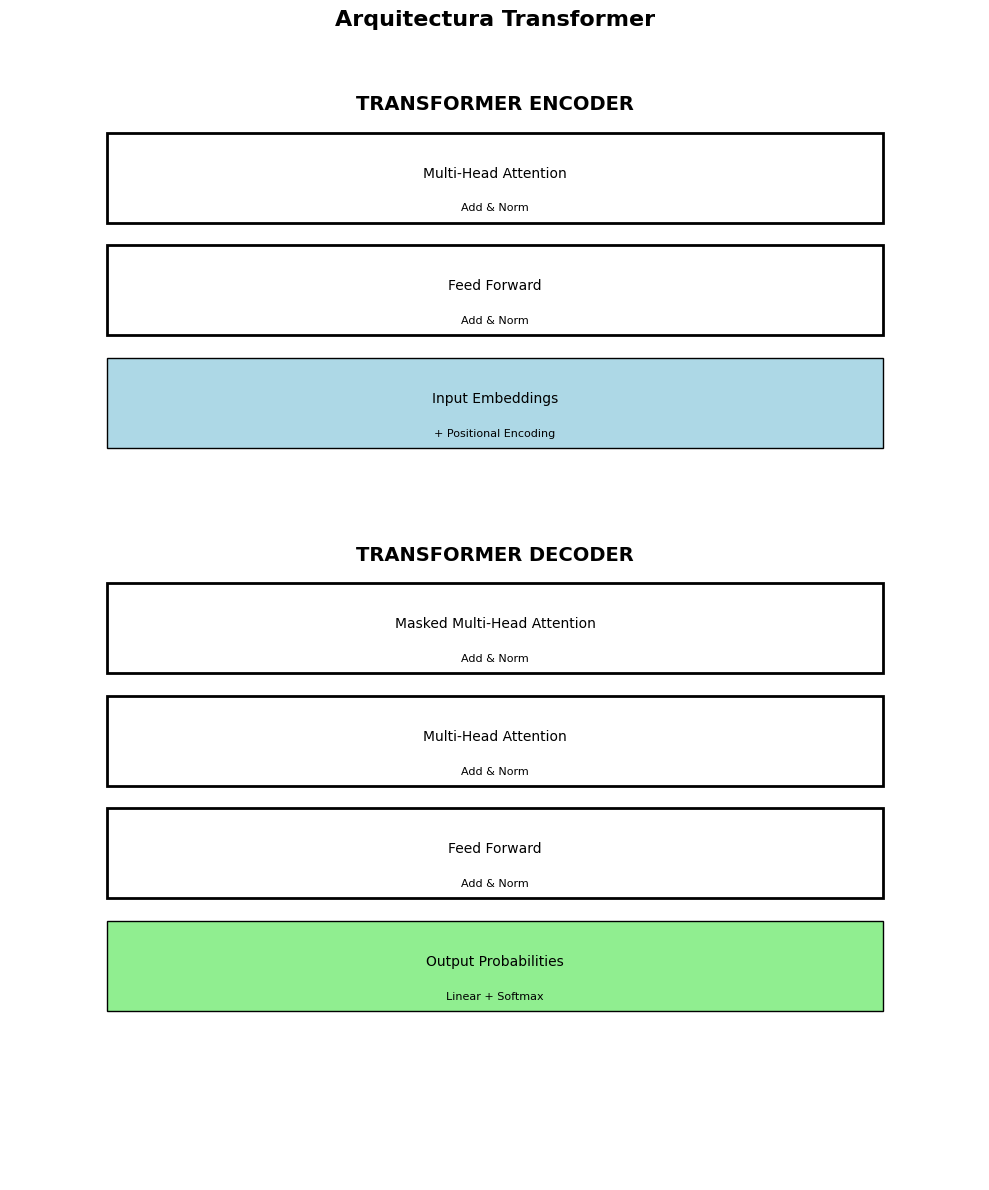

Componentes clave de un Transformer:
1. Attention: Permite al modelo enfocarse en partes relevantes
2. Position Encoding: Codifica información posicional
3. Feed Forward: Procesa la información
4. Layer Norm: Estabiliza el entrenamiento
5. Residual Connections: Facilita el flujo de gradientes


In [3]:
# Visualización conceptual de la arquitectura Transformer
fig, ax = plt.subplots(1, 1, figsize=(10, 12))

# Encoder Stack
ax.text(0.5, 0.95, "TRANSFORMER ENCODER", ha='center', fontsize=14, fontweight='bold')
ax.add_patch(plt.Rectangle((0.1, 0.85), 0.8, 0.08, fill=False, edgecolor='black', linewidth=2))
ax.text(0.5, 0.89, "Multi-Head Attention", ha='center', fontsize=10)
ax.text(0.5, 0.86, "Add & Norm", ha='center', fontsize=8)

ax.add_patch(plt.Rectangle((0.1, 0.75), 0.8, 0.08, fill=False, edgecolor='black', linewidth=2))
ax.text(0.5, 0.79, "Feed Forward", ha='center', fontsize=10)
ax.text(0.5, 0.76, "Add & Norm", ha='center', fontsize=8)

# Input Embeddings
ax.add_patch(plt.Rectangle((0.1, 0.65), 0.8, 0.08, fill=True, facecolor='lightblue', edgecolor='black'))
ax.text(0.5, 0.69, "Input Embeddings", ha='center', fontsize=10)
ax.text(0.5, 0.66, "+ Positional Encoding", ha='center', fontsize=8)

# Decoder Stack
ax.text(0.5, 0.55, "TRANSFORMER DECODER", ha='center', fontsize=14, fontweight='bold')
ax.add_patch(plt.Rectangle((0.1, 0.45), 0.8, 0.08, fill=False, edgecolor='black', linewidth=2))
ax.text(0.5, 0.49, "Masked Multi-Head Attention", ha='center', fontsize=10)
ax.text(0.5, 0.46, "Add & Norm", ha='center', fontsize=8)

ax.add_patch(plt.Rectangle((0.1, 0.35), 0.8, 0.08, fill=False, edgecolor='black', linewidth=2))
ax.text(0.5, 0.39, "Multi-Head Attention", ha='center', fontsize=10)
ax.text(0.5, 0.36, "Add & Norm", ha='center', fontsize=8)

ax.add_patch(plt.Rectangle((0.1, 0.25), 0.8, 0.08, fill=False, edgecolor='black', linewidth=2))
ax.text(0.5, 0.29, "Feed Forward", ha='center', fontsize=10)
ax.text(0.5, 0.26, "Add & Norm", ha='center', fontsize=8)

# Output
ax.add_patch(plt.Rectangle((0.1, 0.15), 0.8, 0.08, fill=True, facecolor='lightgreen', edgecolor='black'))
ax.text(0.5, 0.19, "Output Probabilities", ha='center', fontsize=10)
ax.text(0.5, 0.16, "Linear + Softmax", ha='center', fontsize=8)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')
ax.set_title('Arquitectura Transformer', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("Componentes clave de un Transformer:")
print("1. Attention: Permite al modelo enfocarse en partes relevantes")
print("2. Position Encoding: Codifica información posicional")
print("3. Feed Forward: Procesa la información")
print("4. Layer Norm: Estabiliza el entrenamiento")
print("5. Residual Connections: Facilita el flujo de gradientes")


## 3. Modelos Populares

### Modelos Encoder (BERT, RoBERTa)

- **BERT**: Bidirectional Encoder Representations from Transformers
- **RoBERTa**: Versión optimizada de BERT
- **DistilBERT**: Versión más ligera de BERT

### Modelos Decoder (GPT)

- **GPT-2/GPT-3**: Generative Pre-trained Transformer
- **GPT-4**: Versión más avanzada

### Modelos Encoder-Decoder (T5, BART)

- **T5**: Text-to-Text Transfer Transformer
- **BART**: Bidirectional and Auto-Regressive Transformers


In [4]:
print("Modelos Transformer Populares:\n")

modelos = {
    "Encoder": ["BERT", "RoBERTa", "DistilBERT", "ELECTRA"],
    "Decoder": ["GPT-2", "GPT-3", "GPT-4", "LLaMA"],
    "Encoder-Decoder": ["T5", "BART", "mT5", "UL2"]
}

for tipo, lista_modelos in modelos.items():
    print(f"{tipo}:")
    for modelo in lista_modelos:
        print(f"  - {modelo}")
    print()

print("Aplicaciones:")
print("- Clasificación de texto")
print("- Análisis de sentimiento")
print("- Traducción automática")
print("- Generación de texto")
print("- Preguntas y respuestas")
print("- Resumen de texto")
print("- Named Entity Recognition (NER)")


Modelos Transformer Populares:

Encoder:
  - BERT
  - RoBERTa
  - DistilBERT
  - ELECTRA

Decoder:
  - GPT-2
  - GPT-3
  - GPT-4
  - LLaMA

Encoder-Decoder:
  - T5
  - BART
  - mT5
  - UL2

Aplicaciones:
- Clasificación de texto
- Análisis de sentimiento
- Traducción automática
- Generación de texto
- Preguntas y respuestas
- Resumen de texto
- Named Entity Recognition (NER)
